# City Analysis

In [1]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import median
import numpy as np
from datetime import datetime

In [2]:
conn = lite.connect('../src/db/flatmates_data.db')

In [79]:
query = """SELECT *
FROM flatmates_rent_listings 
"""
df_master = pd.read_sql_query(query,conn)
len(df_master)

24269

In [80]:
df_master.head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,1644358725
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215,0,1,Share House,4,1,1,1644358725
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163,0,1,Share House,4,3,4,1644358725
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207,0,1,Flatshare,2,1,2,1644358725
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220,0,1,Share House,3,3,3,1644358725


In [90]:
def clean_flatmates_df(df_input):
    df_input['city'] = df_input.apply(lambda x: x['city'].strip(),axis=1)
    df_input['price'] = df_input['price']/df_input['rooms_available']
    df_input['date'] = df_input.apply(lambda x: datetime.fromtimestamp(int(x['date'])).strftime('%d-%m-%Y')
         if '-' not in str(x['date']) else x['date'],axis=1)
    df_input['date'] = pd.to_datetime(df_input['date'],format='%d-%m-%Y')
    df_input.sort_values(by='date').head()
    df_output = df_input
    return df_output

In [91]:
clean_flatmates_df(df_master).head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168.0,0,1,Share House,4,1,4,2022-02-09
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215.0,0,1,Share House,4,1,1,2022-02-09
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163.0,0,1,Share House,4,3,4,2022-02-09
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207.0,0,1,Flatshare,2,1,2,2022-02-09
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220.0,0,1,Share House,3,3,3,2022-02-09


In [67]:
df_master['city'] = df_master.apply(lambda x: x['city'].strip(),axis=1)

In [68]:
cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Canberra","Hobart","Darwin"]
df_master = df_master[df_master['city'].isin(cities)]
df_master['city'].unique()

array(['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Adelaide', 'Canberra',
       'Hobart', 'Darwin'], dtype=object)

In [69]:
df_master['date'] = df_master.apply(lambda x: datetime.fromtimestamp(int(x['date'])).strftime('%d-%m-%Y')
         if '-' not in str(x['date']) else x['date']
         ,axis=1)

In [70]:
df_master['price'] = df_master['price']/df_master['rooms_available']

In [71]:
df_master['date'] = pd.to_datetime(df_master['date'],format='%d-%m-%Y')
df_master.sort_values(by='date').head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168.0,0,1,Share House,4,1,4,2022-02-09
78,P896637,/share-house-melbourne-burwood-3125-P896637,Burwood,Melbourne,80.0,1,2,Share House,6,2,6,2022-02-09
77,P1145789,/share-house-melbourne-point-cook-3030-P1145789,Point Cook,Melbourne,210.0,0,1,Share House,4,2,1,2022-02-09
76,P1134350,/share-house-melbourne-berwick-3806-P1134350,Berwick,Melbourne,250.0,0,1,Share House,4,2,3,2022-02-09
75,P1151468,/share-house-melbourne-berwick-3806-P1151468,Berwick,Melbourne,290.0,1,1,Share House,4,2,3,2022-02-09


In [72]:
df_master.where(df_master['date'] >= "2022-05-27").groupby(['date','city']).median().head()

price  rooms_available  bedroom_count  bathroom_count  \
date       city                                                               
2022-05-28 Adelaide   195.0              1.0            3.0             2.0   
           Brisbane   225.0              1.0            3.0             2.0   
           Canberra   250.0              1.0            3.0             2.0   
           Hobart     185.0              1.0            3.0             1.0   
           Melbourne  217.0              1.0            3.0             2.0   

                      people_count  
date       city                     
2022-05-28 Adelaide            3.0  
           Brisbane            2.0  
           Canberra            2.0  
           Hobart              2.5  
           Melbourne           2.0

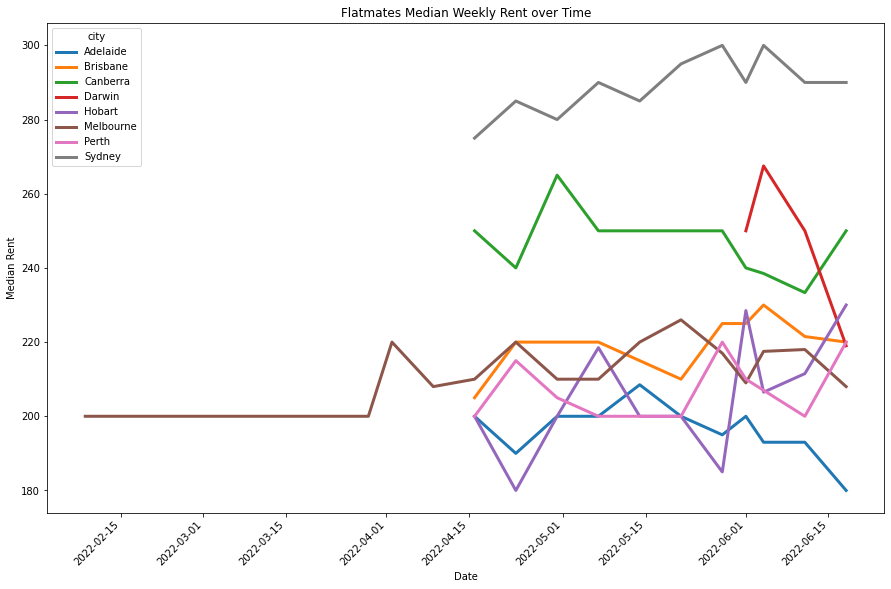

In [73]:
# plt.style.use('fivethirtyeight')
df=df_master
df.groupby(['date','city']) \
    .median()['price'] \
    .unstack() \
    .plot(
    figsize=(15,10),
    linewidth=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Median Rent")
plt.title("Flatmates Median Weekly Rent over Time")
plt.show()

In [74]:
df.groupby(['date','city'])['flatmates_id'].count()

date        city     
2022-02-09  Melbourne     108
2022-02-10  Melbourne     337
2022-03-08  Melbourne    2264
2022-03-24  Melbourne     859
2022-03-29  Melbourne     271
                         ... 
2022-06-18  Darwin         11
            Hobart         39
            Melbourne     348
            Perth         130
            Sydney        511
Name: flatmates_id, Length: 88, dtype: int64

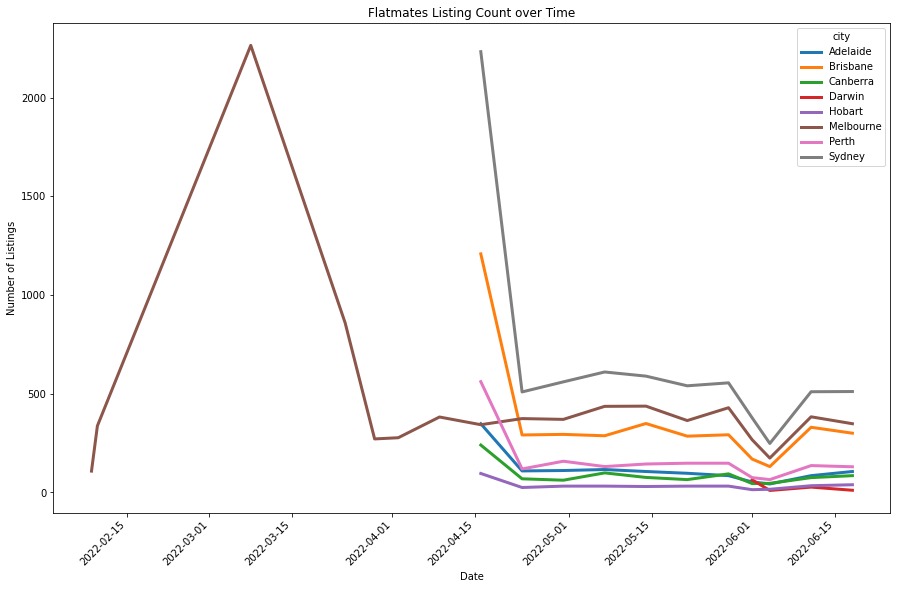

In [75]:
# plt.style.use('fivethirtyeight')

df.groupby(['date','city']) \
    ['flatmates_id'].count() \
    .unstack() \
    .plot(
    figsize=(15,10),
    linewidth=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Listings")
plt.title("Flatmates Listing Count over Time")
plt.show()

In [105]:
query = """SELECT *
FROM flatmates_rent_listings 
"""
df_master = pd.read_sql_query(query,conn)
df = clean_flatmates_df(df_master)
df.head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168.0,0,1,Share House,4,1,4,2022-02-09
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215.0,0,1,Share House,4,1,1,2022-02-09
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163.0,0,1,Share House,4,3,4,2022-02-09
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207.0,0,1,Flatshare,2,1,2,2022-02-09
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220.0,0,1,Share House,3,3,3,2022-02-09


In [126]:
# grp = df.groupby(['date','suburb'])
# grp['price'].apply(print)
df.where(df['date'] >= "2022-06-17").groupby(['date','suburb']).median().sort_values(['price'],ascending=False)

price  rooms_available  bedroom_count  \
date       suburb                                                          
2022-06-18 Braybrook          550.000000              1.0            1.5   
           Werribee South     500.000000              1.0            4.0   
           Killarney Heights  490.000000              1.0            2.0   
           Haymarket          470.000000              1.0            2.0   
           Bellerive          460.000000              1.0            2.0   
...                                  ...              ...            ...   
           Hurlstone Park      50.000000              1.0            4.0   
           Armadale            45.833333              6.0            6.0   
           Park Orchards       36.666667              3.0            3.0   
           Forest Lodge         0.000000              3.0            3.0   
           Marangaroo           0.000000              1.0            4.0   

                              bathroom_count  people_count  
date       suburb                                           
2022-06-18 Braybrook                     1.0           0.5  
           Werribee South                3.0           1.0  
           Killarney Heights             3.0           1.0  
           Haymarket                     2.0           2.0  
           Bellerive                     3.0           2.0  
...                                      ...           ...  
           Hurlstone Park                2.0           3.0  
           Armadale                      3.0           1.0  
           Park Orchards                 1.0           2.0  
           Forest Lodge                  2.0           0.0  
           Marangaroo                    2.0           2.0  

[717 rows x 5 columns]

In [ ]:
df_
df_rent_sort.head(20)

In [96]:
df_rent_sort[df_rent_sort['city']=="Melbourne"]

,suburb,city,rooms_available,average_price
35,Balaclava,Melbourne,44,360.700000
60,Saint Kilda,Melbourne,14,338.727273
62,Elwood,Melbourne,120,337.701149
66,East Melbourne,Melbourne,18,335.277778
75,Albert Park,Melbourne,20,329.062500
...,...,...,...,...
966,Rockbank,Melbourne,7,171.000000
967,Cairnlea,Melbourne,10,170.285714
968,St Albans,Melbourne,61,170.196078
969,Broadmeadows,Melbourne,20,169.187500


In [93]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Bondi Beach,195,383
1,North Bondi,91,371
2,Sydney,126,370
3,Manly,168,370
4,Bronte,40,368
5,Mosman,37,367
6,Freshwater,38,365
7,Zetland,88,362
8,Waterloo,88,354
9,Waverley,34,350


In [19]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
AND NOT house_type = "Student Accommodation"
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY rooms_available DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Bondi Beach,194,383
1,Randwick,191,288
2,Surry Hills,172,301
3,Manly,167,370
4,Coogee,166,328
5,Bondi Junction,133,306
6,Maroubra,131,300
7,Sydney,123,371
8,Bondi,122,336
9,Newtown,119,254


In [20]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price  
LIMIT 10
"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Milperra,10,73
1,Padstow,22,120
2,Denistone East,9,126
3,Fairfield,15,129
4,Macquarie Fields,12,137
5,Richmond,10,140
6,Rydalmere,10,149
7,Sydenham,8,149
8,Oran Park,18,151
9,Beecroft,6,153
